In [1]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.8.0


In [3]:
mnist = tf.keras.datasets.mnist

In [9]:
data = mnist.load_data()

In [10]:
type(data)

tuple

In [11]:
(x_train,y_train),(x_test,y_test) = data

In [12]:
import matplotlib.pyplot as plt

3
(28, 28)


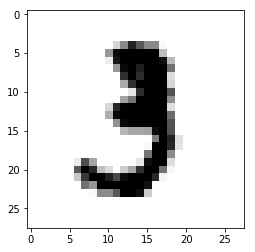

In [27]:
plt.imshow(x_train[10],cmap=plt.cm.binary)
print(y_train[10])
print(x_train[10].shape)

In [29]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

3
(28, 28)


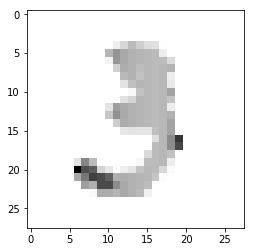

In [30]:
plt.imshow(x_train[10],cmap=plt.cm.binary)
print(y_train[10])
print(x_train[10].shape)

In [31]:
model = tf.keras.Sequential()

In [32]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.2873 - acc: 0.9177
Epoch 2/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.2812 - acc: 0.9202
Epoch 3/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.2769 - acc: 0.9207
Epoch 4/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.2737 - acc: 0.9218
Epoch 5/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.2698 - acc: 0.9227
Epoch 6/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.2675 - acc: 0.9232
Epoch 7/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.2636 - acc: 0.9244
Epoch 8/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.2628 - acc: 0.9249
Epoch 9/15
60000/60000 [==============================] - 4s 71us/step - loss: 0.2607 - acc: 0.9258
Epoch 10/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.2578 - acc: 0.9264

In [36]:
predition = model.predict([x_test])

In [37]:
print(predition)

[[1.98378203e-10 5.88311816e-14 1.31198860e-07 ... 9.99535918e-01
  2.61427324e-08 2.89087238e-05]
 [2.03547588e-05 3.13264934e-07 9.99153256e-01 ... 3.12232055e-22
  5.14324574e-06 1.00769624e-16]
 [3.98532478e-08 9.95289683e-01 3.33906384e-03 ... 1.16329626e-04
  4.72747633e-04 1.42403742e-05]
 ...
 [1.97416994e-09 1.40734483e-06 9.42497263e-06 ... 1.99210318e-03
  1.51595445e-02 3.40234675e-02]
 [4.29376911e-07 6.75194542e-06 7.93231084e-06 ... 8.14989320e-08
  1.54030725e-01 1.86029285e-06]
 [2.98319937e-05 5.84588530e-13 1.99271645e-03 ... 2.22103169e-10
  1.13767919e-06 4.73582951e-10]]


1


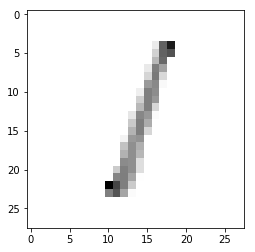

In [41]:
plt.imshow(x_test[2],cmap=plt.cm.binary)
print(y_test[2])

In [42]:
import numpy as np

In [45]:
result = np.argmax(predition,axis=1)

In [46]:
result

array([7, 2, 1, ..., 4, 5, 6])

In [47]:
model.save('digit_model.model')

In [52]:
model.save_weights("./modelweights.h5")

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [55]:
print(100480-28*28*128)

128


In [56]:
print(128*128+128)

16512


In [57]:
print(128*10+10)

1290


In [58]:
testResult = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 30us/step


In [61]:
print("Loss: ",testResult[0]," Accurrancy: ",testResult[1])

Loss:  0.2944168370783329  Accurrancy:  0.9225
